<a href="https://colab.research.google.com/github/aruaru0/pytorch-classifier-sample/blob/main/pytorch_lightning_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install timm
!pip install icrawler
!!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00


['Collecting pytorch-lightning',
 '  Downloading pytorch_lightning-2.0.5-py3-none-any.whl (722 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/722.4 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b \x1b716.8/722.4 kB\x1b \x1b30.9 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b722.4/722.4 kB\x1b \x1b18.6 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: numpy>=1.17.2 in /usr/local/lib/python3.10/dist-packages (from pytorch-lightning) (1.22.4)',
 'Requirement already satisfied: torch>=1.11.0 in /usr/local/lib/python3.10/dist-packages (from pytorch-lightning) (2.0.1+cu118)',
 'Requirement already satisfied: tqdm>=4.57.0 in /usr/local/lib/python3.10/dist-packages (from pytorch-lightning) (4.65.0)',
 'Requirement already satisfied: PyYAML>=5.4 in /usr/local/lib/python3.10/dist-packages (from pytorch-lightning) (6.0)',
 'Requirement

In [2]:
import torch
import timm
import numpy as np
from icrawler.builtin import GoogleImageCrawler

from torch.utils.data import DataLoader

import pytorch_lightning as pl
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# 画像を取得する

In [3]:
google_crawler = GoogleImageCrawler(
    storage={'root_dir': 'images/dog'})
google_crawler.crawl(keyword='dog', max_num=100)

ERROR:downloader:Response status code 400, file https://www.thesprucepets.com/thmb/hxWjs7evF2hP1Fb1c1HAvRi_Rw0\u003d/2765x0/filters:no_upscale():strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg
ERROR:downloader:Exception caught when downloading file https://www.nylabone.com/-/media/project/oneweb/nylabone/images/dog101/activities-fun/10-great-small-dog-breeds/maltese-portrait.jpg, error: HTTPSConnectionPool(host='www.nylabone.com', port=443): Max retries exceeded with url: /-/media/project/oneweb/nylabone/images/dog101/activities-fun/10-great-small-dog-breeds/maltese-portrait.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)'))), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.nylabone.com/-/media/project/oneweb/nylabone/images/dog101/activities-fun/10-great-small-dog-breeds/maltese-portrait.jpg,

In [4]:
google_crawler = GoogleImageCrawler(
    storage={'root_dir': 'images/cat'})
google_crawler.crawl(keyword='cat', max_num=100)

ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Cat_November_2010-1a.jpg
ERROR:downloader:Response status code 400, file https://www.thesprucepets.com/thmb/uQnGtOt9VQiML2oG2YzAmPErrHo\u003d/5441x0/filters:no_upscale():strip_icc()/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg
ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg
ERROR:downloader:Response status code 401, file https://i.guim.co.uk/img/media/26392d05302e02f7bf4eb143bb84c8097d09144b/446_167_3683_2210/master/3683.jpg
ERROR:downloader:Response status code 400, file https://th-thumbnailer.cdn-si-edu.com/bZAar59Bdm95b057iESytYmmAjI\u003d/1400x1050/filters:focal(594x274:595x275)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/95/db/95db799b-fddf-4fde-91f3-77024442b92d/egypt_kitty_social.jpg
ERROR:downloader:Response status code 400, file https://cdn.theatlantic.com/thumbor/

In [5]:
!mkdir images/train images/valid images/train/cat images/train/dog images/valid/cat images/valid/dog
!mv images/cat/00000?.jpg images/valid/cat
!mv images/dog/00000?.jpg images/valid/dog
!mv images/cat images/train
!mv images/dog images/train

In [6]:
!ls -lR images

images:
total 8
drwxr-xr-x 4 root root 4096 Jul 12 03:59 train
drwxr-xr-x 4 root root 4096 Jul 12 03:59 valid

images/train:
total 8
drwxr-xr-x 2 root root 4096 Jul 12 03:59 cat
drwxr-xr-x 2 root root 4096 Jul 12 03:59 dog

images/train/cat:
total 33052
-rw-r--r-- 1 root root  2299665 Jul 12 03:56 000008.png
-rw-r--r-- 1 root root   634575 Jul 12 03:56 000010.jpg
-rw-r--r-- 1 root root    40934 Jul 12 03:56 000011.jpg
-rw-r--r-- 1 root root   162437 Jul 12 03:56 000012.jpg
-rw-r--r-- 1 root root  1246129 Jul 12 03:56 000013.png
-rw-r--r-- 1 root root    38418 Jul 12 03:56 000014.jpg
-rw-r--r-- 1 root root  1197756 Jul 12 03:56 000015.jpg
-rw-r--r-- 1 root root    68927 Jul 12 03:56 000016.jpg
-rw-r--r-- 1 root root   107329 Jul 12 03:56 000017.jpg
-rw-r--r-- 1 root root   163692 Jul 12 03:56 000018.jpg
-rw-r--r-- 1 root root   107994 Jul 12 03:56 000019.jpg
-rw-r--r-- 1 root root   130185 Jul 12 03:56 000020.jpg
-rw-r--r-- 1 root root   153491 Jul 12 03:56 000021.jpg
-rw-r--r-- 1 root 

# データローダ・データセットの作成

In [7]:
from timm.data import create_dataset, create_loader
from timm.data.transforms_factory import create_transform

In [8]:
dataset_train = create_dataset('train', root="./images/train", class_map={'dog':0, 'cat':1}, transform=create_transform(224))
dataset_valid = create_dataset('valid', root="./images/valid", class_map={'dog':0, 'cat':1}, transform=create_transform(224))

1

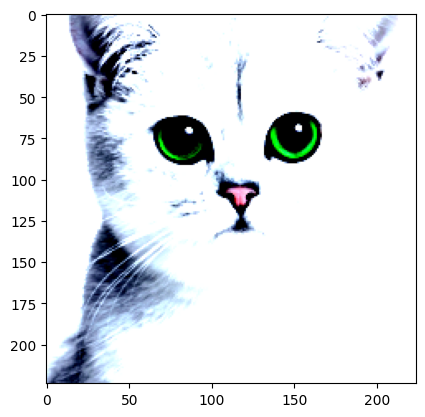

In [9]:
import matplotlib.pyplot as plt
img, label = dataset_train[0]
plt.imshow(img.permute(1,2,0))
label

In [10]:
dataloader_train = DataLoader(dataset_train, batch_size=16, shuffle=True)
dataloader_valid = DataLoader(dataset_valid, batch_size=8, shuffle=False)

In [11]:
# 確認
for X, y in dataloader_valid:
  print(y)

tensor([1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0])
tensor([0])


# パラメータ設定

In [12]:
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# LightningModuleを定義

In [13]:
class myModule(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = timm.create_model('resnet18', pretrained=True, num_classes=2)
        self.loss_fn = torch.nn.CrossEntropyLoss()
        self.training_step_outputs = []
        self.validation_step_outputs = []

    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self.model(x)
        loss = self.loss_fn(pred, y)
        self.training_step_outputs.append(loss)
        return loss

    def on_train_epoch_end(self):
        epoch_mean = torch.stack(self.training_step_outputs).mean()
        self.log("train_loss", epoch_mean, prog_bar=True)
        self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        x, y = batch
        pred = self.model(x)
        loss = self.loss_fn(pred, y)
        self.validation_step_outputs.append(loss)
        return loss

    def on_validation_epoch_end(self):
        epoch_mean = torch.stack(self.validation_step_outputs).mean()
        self.log("valid_loss", epoch_mean, prog_bar=True)
        self.validation_step_outputs.clear()

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=0.001, weight_decay=0.0001)



# 学習

In [14]:
module = myModule()
trainer = pl.Trainer(max_epochs=num_epochs)

trainer.fit(model=module,
            train_dataloaders = dataloader_train,
            val_dataloaders = dataloader_valid)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type             | Params
---------------------------------------------
0 | model   | ResNet           | 11.2 M
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


# 評価

In [15]:
# modelの部分的だけ取り出し
model = module.model

In [16]:
from tqdm import tqdm
model.to(device)
model.eval()
y_pred = []
y_gt = []
for batch in tqdm(dataloader_valid):
    inputs, targets = batch
    with torch.no_grad() :
      outputs = model(inputs.to(device))
    y_gt += targets.tolist()
    y_pred += outputs.argmax(axis=1).tolist()


100%|██████████| 3/3 [00:01<00:00,  1.56it/s]


In [17]:
y_pred, y_gt

([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 指標の計算

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [19]:
confusion_matrix(y_gt, y_pred)

array([[9, 0],
       [1, 7]])

In [20]:
acc, recall, prec, fs = accuracy_score(y_gt, y_pred), recall_score(y_gt, y_pred), precision_score(y_gt, y_pred), f1_score(y_gt, y_pred)
print(f"acc={acc}, recall={recall}, precition = {prec},  f-score={fs}")

acc=0.9411764705882353, recall=0.875, precition = 1.0,  f-score=0.9333333333333333


# ミス画像の表示

gt 1


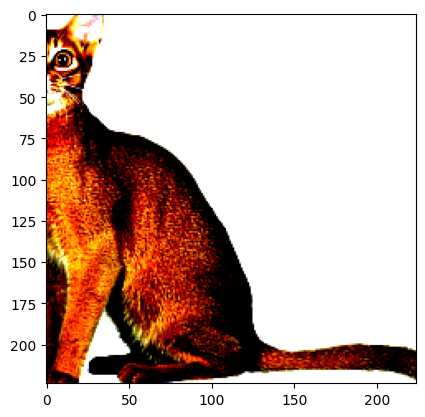

In [21]:
for idx, (x, y) in enumerate(zip(y_pred, y_gt)):
  if x != y :
    img, label = dataset_valid[idx]
    print("gt", y)
    plt.imshow(img.permute(1,2,0))
    plt.show()